In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df_no_outliers = pd.read_csv('new_df_without_outliers_copy_smote_resampled.csv')
df_outliers = pd.read_csv('new_df_outliers_only_copy_smote_resampled.csv')
df_no_outliers_no_normalization = pd.read_csv('new_df_without_outliers_copy_smote_resampled_noNormalised.csv')
df_outliers_no_normalization = pd.read_csv('new_df_outliers_only_copy_smote_resampled_noNormalised.csv')

X_no_outliers = df_no_outliers.iloc[:, 0:8]
y_no_outliers = df_no_outliers['diabetes']

X_with_outliers = df_outliers.iloc[:, 0:8]
y_with_outliers = df_outliers['diabetes']

X_no_outliers_no_normalization = df_no_outliers_no_normalization.iloc[:, 0:8]
y_no_outliers_no_normalization = df_no_outliers_no_normalization['diabetes']

X_outliers_no_normalization = df_outliers_no_normalization.iloc[:, 0:8]
y_outliers_no_normalization = df_outliers_no_normalization['diabetes']

<h3> Logistic Regression on df_no_outliers<h3>

In [3]:
# split dataset to training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, 
                                                          test_size = 0.2, random_state = 42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

Confusion Matrix:


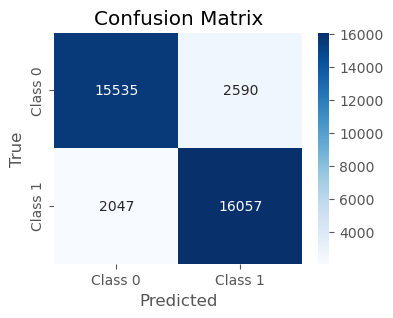

In [4]:
# Confusion Matrix
print('Confusion Matrix:')
cm = confusion_matrix(y_test, lr_pred)

# Heatmap of Confusion Matrix
class_labels = ["Class 0", "Class 1"]
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [5]:
# Performance Evaluation 
print('Accuracy:')
accuracy = accuracy_score(y_test, lr_pred)
print(accuracy)

print('\nPrecision:')
precision = precision_score(y_test, lr_pred)
print(precision)

print('\nRecall:')
recall = recall_score(y_test, lr_pred)
print(recall)

print('\nF1 score:')
f1 = f1_score(y_test, lr_pred) 
print(f1)

print('\nROC AUC score:')
roc_auc = roc_auc_score(y_test, lr_pred)
print(roc_auc)

Accuracy:
0.872008611885506

Precision:
0.8611036627875798

Recall:
0.8869310649580203

F1 score:
0.8738265625425158

ROC AUC score:
0.8720172566169412


In [6]:
train_accuracy = accuracy_score(y_train, lr.predict(X_train))
print('Training Accuracy: ' + str(train_accuracy))

# Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits = 15, random_state = 42, shuffle = True)

cv_lr = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = kfold, scoring='accuracy')
cv_accuracy = cv_lr.mean()
print('Cross Validation Accuracy: ' + str(cv_accuracy))

Training Accuracy: 0.8705724045129903
Cross Validation Accuracy: 0.8705241003346789


In [7]:
# get predictions 
predictions = lr.predict(X_test)

# compare results
pd.DataFrame({'Actual': y_test, 'Predicted': predictions}) \
    .sample(10)

,Actual,Predicted
52593,0,0
137957,1,0
169666,1,1
107263,1,1
31936,0,0
83614,0,0
159367,1,1
58640,0,0
179939,1,1
38242,0,1


In [8]:
results = pd.DataFrame([['Without outliers, Normalized data', train_accuracy, accuracy, cv_accuracy, precision, recall, f1, roc_auc]], 
                       columns = ['Logistic Regression Model', 'Training Accuracy', 'Testing Accuracy', 'CV Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'])

summary = results
summary


,Logistic Regression Model,Training Accuracy,Testing Accuracy,CV Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,"Without outliers, Normalized data",0.870572,0.872009,0.870524,0.861104,0.886931,0.873827,0.872017


<h3> Logistic Regression on df_outliers<h3>

In [9]:
# split dataset to training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_with_outliers, y_with_outliers, 
                                                          test_size = 0.2, random_state = 42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

Confusion Matrix:


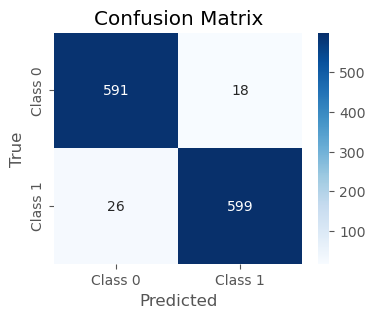

In [10]:
# Confusion Matrix
print('Confusion Matrix:')
cm = confusion_matrix(y_test, lr_pred)

# Heatmap of Confusion Matrix
class_labels = ["Class 0", "Class 1"]
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [11]:
# Performance Evaluation 
print('Accuracy:')
accuracy = accuracy_score(y_test, lr_pred)
print(accuracy)

print('\nPrecision:')
precision = precision_score(y_test, lr_pred)
print(precision)

print('\nRecall:')
recall = recall_score(y_test, lr_pred)
print(recall)

print('\nF1 score:')
f1 = f1_score(y_test, lr_pred) 
print(f1)

print('\nROC AUC score:')
roc_auc = roc_auc_score(y_test, lr_pred)
print(roc_auc)

Accuracy:
0.9643435980551054

Precision:
0.9708265802269044

Recall:
0.9584

F1 score:
0.964573268921095

ROC AUC score:
0.9644216748768474


In [12]:
train_accuracy = accuracy_score(y_train, lr.predict(X_train))
print('Training Accuracy: ' + str(train_accuracy))

# Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits = 15, random_state = 42, shuffle = True)

cv_lr = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = kfold, scoring='accuracy')
cv_accuracy = cv_lr.mean()
print('Cross Validation Accuracy: ' + str(cv_accuracy))

Training Accuracy: 0.9716254560194568
Cross Validation Accuracy: 0.971425482491907


In [13]:
# get predictions 
predictions = lr.predict(X_test)

# compare results
pd.DataFrame({'Actual': y_test, 'Predicted': predictions}) \
    .sample(10)

,Actual,Predicted
1942,1,1
1223,0,0
3751,1,1
2107,1,1
1357,1,1
3544,1,1
2598,1,1
4239,0,0
748,0,0
3128,1,1


In [14]:
results = pd.DataFrame([['Outliers only, Normalized data', train_accuracy, accuracy, cv_accuracy, precision, recall, f1, roc_auc]], 
                       columns = ['Logistic Regression Model', 'Training Accuracy', 'Testing Accuracy', 'CV Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'])

summary = pd.concat([summary, results], ignore_index=True)
summary

,Logistic Regression Model,Training Accuracy,Testing Accuracy,CV Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,"Without outliers, Normalized data",0.870572,0.872009,0.870524,0.861104,0.886931,0.873827,0.872017
1,"Outliers only, Normalized data",0.971625,0.964344,0.971425,0.970827,0.958400,0.964573,0.964422


<h3> Logistic Regression on df_no_outliers_no_normalization<h3>

In [15]:
# split dataset to training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers_no_normalization, y_no_outliers_no_normalization, 
                                                          test_size = 0.2, random_state = 42)

lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

Confusion Matrix:


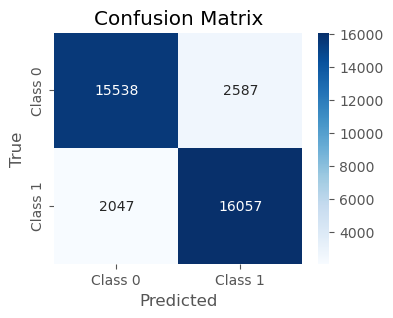

In [16]:
# Confusion Matrix
print('Confusion Matrix:')
cm = confusion_matrix(y_test, lr_pred)

# Heatmap of Confusion Matrix
class_labels = ["Class 0", "Class 1"]
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [17]:
# Performance Evaluation 
print('Accuracy:')
accuracy = accuracy_score(y_test, lr_pred)
print(accuracy)

print('\nPrecision:')
precision = precision_score(y_test, lr_pred)
print(precision)

print('\nRecall:')
recall = recall_score(y_test, lr_pred)
print(recall)

print('\nF1 score:')
f1 = f1_score(y_test, lr_pred) 
print(f1)

print('\nROC AUC score:')
roc_auc = roc_auc_score(y_test, lr_pred)
print(roc_auc)

Accuracy:
0.8720914184769107

Precision:
0.8612422226989916

Recall:
0.8869310649580203

F1 score:
0.873897899205399

ROC AUC score:
0.8721000152376309


In [18]:
train_accuracy = accuracy_score(y_train, lr.predict(X_train))
print('Training Accuracy: ' + str(train_accuracy))

# Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits = 15, random_state = 42, shuffle = True)

cv_lr = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = kfold, scoring='accuracy')
cv_accuracy = cv_lr.mean()
print('Cross Validation Accuracy: ' + str(cv_accuracy))

Training Accuracy: 0.870579305109892
Cross Validation Accuracy: 0.8705102991408757


In [19]:
# get predictions 
predictions = lr.predict(X_test)

# compare results
pd.DataFrame({'Actual': y_test, 'Predicted': predictions}) \
    .sample(10)

,Actual,Predicted
151556,1,1
158406,1,1
69460,0,1
13102,0,0
61219,0,0
173890,1,1
78774,0,0
123094,1,1
52677,0,1
166643,1,0


In [20]:
results = pd.DataFrame([['Without outliers, Non-normalized data', train_accuracy, accuracy, cv_accuracy, precision, recall, f1, roc_auc]], 
                       columns = ['Logistic Regression Model', 'Training Accuracy', 'Testing Accuracy', 'CV Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'])

summary = pd.concat([summary, results], ignore_index=True)
summary

,Logistic Regression Model,Training Accuracy,Testing Accuracy,CV Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,"Without outliers, Normalized data",0.870572,0.872009,0.870524,0.861104,0.886931,0.873827,0.872017
1,"Outliers only, Normalized data",0.971625,0.964344,0.971425,0.970827,0.958400,0.964573,0.964422
2,"Without outliers, Non-normalized data",0.870579,0.872091,0.870510,0.861242,0.886931,0.873898,0.872100


<h3> Logistic Regression on df_outliers_no_normalization<h3>

In [21]:
# split dataset to training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_outliers_no_normalization, y_outliers_no_normalization, 
                                                          test_size = 0.2, random_state = 42)

lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

Confusion Matrix:


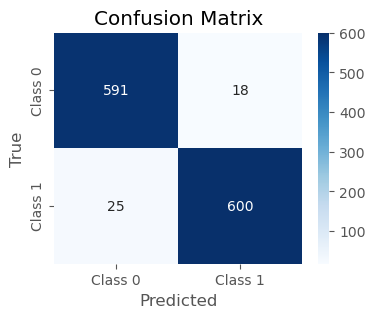

In [22]:
# Confusion Matrix
print('Confusion Matrix:')
cm = confusion_matrix(y_test, lr_pred)

# Heatmap of Confusion Matrix
class_labels = ["Class 0", "Class 1"]
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [23]:
# Performance Evaluation 
print('Accuracy:')
accuracy = accuracy_score(y_test, lr_pred)
print(accuracy)

print('\nPrecision:')
precision = precision_score(y_test, lr_pred)
print(precision)

print('\nRecall:')
recall = recall_score(y_test, lr_pred)
print(recall)

print('\nF1 score:')
f1 = f1_score(y_test, lr_pred) 
print(f1)

print('\nROC AUC score:')
roc_auc = roc_auc_score(y_test, lr_pred)
print(roc_auc)

Accuracy:
0.9651539708265803

Precision:
0.970873786407767

Recall:
0.96

F1 score:
0.9654062751407885

ROC AUC score:
0.9652216748768473


In [24]:
train_accuracy = accuracy_score(y_train, lr.predict(X_train))
print('Training Accuracy: ' + str(train_accuracy))

# Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits = 15, random_state = 42, shuffle = True)

cv_lr = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = kfold, scoring='accuracy')
cv_accuracy = cv_lr.mean()
print('Cross Validation Accuracy: ' + str(cv_accuracy))

Training Accuracy: 0.9712201053911633
Cross Validation Accuracy: 0.9710202140015322


In [25]:
# get predictions 
predictions = lr.predict(X_test)

# compare results
pd.DataFrame({'Actual': y_test, 'Predicted': predictions}) \
    .sample(10)

,Actual,Predicted
5129,0,0
1825,1,1
5789,0,0
907,0,0
4239,0,0
4498,0,0
611,0,0
5148,0,0
2688,1,1
960,0,0


In [26]:
results = pd.DataFrame([['Outliers only, Non-normalized data', train_accuracy, accuracy, cv_accuracy, precision, recall, f1, roc_auc]], 
                       columns = ['Logistic Regression Model', 'Training Accuracy', 'Testing Accuracy', 'CV Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'])

summary = pd.concat([summary, results], ignore_index=True)
summary

,Logistic Regression Model,Training Accuracy,Testing Accuracy,CV Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,"Without outliers, Normalized data",0.870572,0.872009,0.870524,0.861104,0.886931,0.873827,0.872017
1,"Outliers only, Normalized data",0.971625,0.964344,0.971425,0.970827,0.958400,0.964573,0.964422
2,"Without outliers, Non-normalized data",0.870579,0.872091,0.870510,0.861242,0.886931,0.873898,0.872100
3,"Outliers only, Non-normalized data",0.971220,0.965154,0.971020,0.970874,0.960000,0.965406,0.965222
